<a href="https://colab.research.google.com/github/ranjan0601/EDA_Project/blob/GlobalTerrorism_eda/GlobalTerrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Practice_project/globalterrorismdb_0718dist.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###1 Introduction
As a security or defense analyst, we have been tasked to analyze the data and draw conclusions
on the distribution and nature of terrorist incidents recorded around the world. The aim of this
analysis is to provide answers to the following questions:


• How has the number of terrorist activities changed over the years? Are there certain regions
where this trend is different from the global averages?

• Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?

• What are the most common methods of attacks? Does it differ in various regions or in time?

# Understanding the columns of dataset:

• success - Success of a terrorist strike.
• suicide - 1 = “Yes” The incident was a suicide attack. 0 = “No” There is no indication that the incident was a suicide.
• attacktype1 - The general method of attack.
• attacktype1_txt - The general method of attack and broad class of tactics used.
• targtype1_txt - The general type of target/victim
• targsubtype1_txt - The more specific target category
• target1 - The specific person, building, installation that was targeted and/or victimized
• natlty1_txt - The nationality of the target that was attacked
• gname - The name of the group that carried out the attack
• gsubname - Additional details about group that carried out the attack like fractions
• nperps - The total number of terrorists participating in the incident
• weaptype1_txt - General type of weapon used in the incident
• weapsubtype1_txt - More specific value for most of the Weapon Types
• nkill - The number of total confirmed fatalities for the incident
• nkillus - The number of U.S. citizens who died as a result of the incident

In [4]:
data = pd.read_csv(path, encoding = 'ISO-8859-1')

<ipython-input-4-ba016eafc060>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, encoding = 'ISO-8859-1')


In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# select the collumns which we are using for our analysis
gtd = data[['eventid', 'iyear','success','imonth', 'iday','country_txt','region_txt','suicide',
            'attacktype1_txt', 'targtype1_txt','target1','nkill']]

In [7]:
gtd.head(2)

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0
1,197000000002,1970,1,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0


In [47]:
# pd.set_option('display.max_rows', None)  #this sets to show the entire row when displaying dataframe.

In [9]:
gtd.shape #dataset has 1,81,691 rows and 12 columns

(181691, 12)

In [10]:
# .info gets the idea about null col and dtype of column
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   success          181691 non-null  int64  
 3   imonth           181691 non-null  int64  
 4   iday             181691 non-null  int64  
 5   country_txt      181691 non-null  object 
 6   region_txt       181691 non-null  object 
 7   suicide          181691 non-null  int64  
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  target1          181055 non-null  object 
 11  nkill            171378 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 16.6+ MB


In [11]:
gtd.isnull().sum()/gtd.shape[0]  #null quantity in term of percentage of total row.

eventid            0.000000
iyear              0.000000
success            0.000000
imonth             0.000000
iday               0.000000
country_txt        0.000000
region_txt         0.000000
suicide            0.000000
attacktype1_txt    0.000000
targtype1_txt      0.000000
target1            0.003500
nkill              0.056761
dtype: float64

##### We have a null value in target1 and nkill. Lets replace the null value in target1 with Unknown and nkill is of float datatype so replace it by 0.00

In [12]:
gtd['target1'] = gtd['target1'].fillna('Unknown')
gtd['nkill'] = gtd['nkill'].fillna(0.00)

<ipython-input-12-ee36890c09bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd['target1'] = gtd['target1'].fillna('Unknown')
<ipython-input-12-ee36890c09bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd['nkill'] = gtd['nkill'].fillna(0.00)


In [13]:
gtd.isnull().sum()

eventid            0
iyear              0
success            0
imonth             0
iday               0
country_txt        0
region_txt         0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
nkill              0
dtype: int64

In [ ]:
## Let look at the trend over the year.

yearly_attacks = gtd.groupby('iyear').size().reset_index(name = 'count')
yearly_attacks

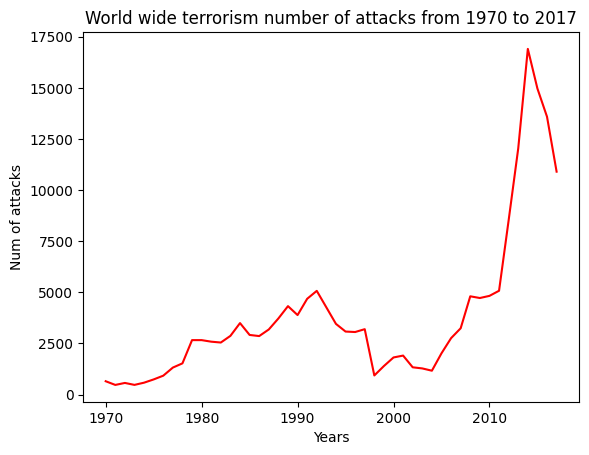

In [15]:
# sns.lineplot(x, y, data, color)
# plt.xlable('')
# plt.ylable('')
# plt.title('')
# plt.show()

sns.lineplot(x = 'iyear', y = 'count', data = yearly_attacks, color = 'red')
plt.xlabel('Years')
plt.ylabel('Num of attacks')
plt.title('World wide terrorism number of attacks from 1970 to 2017')
plt.show()

Here we can see that there is a drastic incrase in terrorist atttact after 2005-07 and it spiked up to a highest level.

In [ ]:
## Let understand the terrorist attack trend by region.

yearly_attack_regionwise = gtd.groupby(['iyear', 'region_txt']).size().reset_index(name = 'count')
yearly_attack_regionwise

Text(0, 0.5, 'No of terrorist attack')

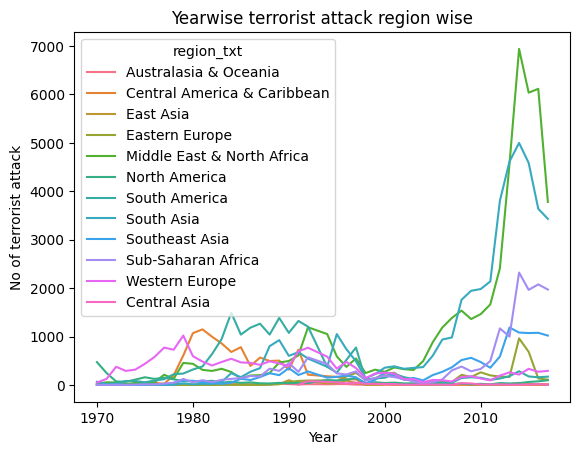

In [17]:
# sns.lineplot(x, y, hue, data, color)
# plt.title()
# plt.xlabel()
# plt.ylabel()

sns.lineplot(x = 'iyear', y = 'count', hue = 'region_txt', data = yearly_attack_regionwise)
plt.title("Yearwise terrorist attack region wise")
plt.xlabel('Year')
plt.ylabel('No of terrorist attack')

The number of attack in Middle east & north africa and South asia has increased significantly in present days as compared with previous one.

In [18]:
## Let understand the country with most terrorist attack.

country_attacks = gtd.groupby('country_txt').size().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
top5_country = country_attacks.head(5)

Top 5 most attacked nation is Iraq, pakistan, afghanistan, India, and colombia

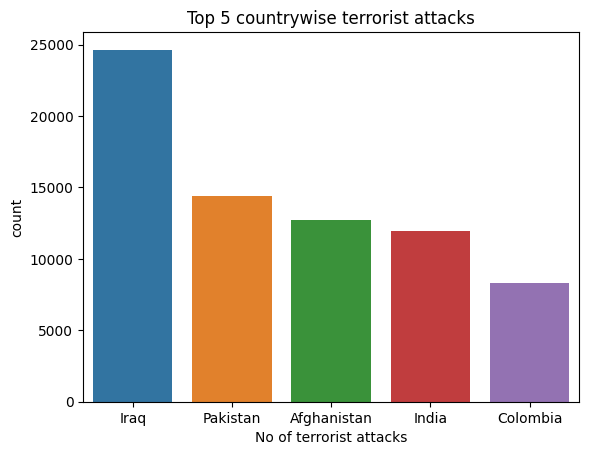

In [19]:
# sns.barplot(x, y , data)
# plt.title('')
# plt.xlabel('')
# plt.ylabel('')

sns.barplot(x = 'country_txt', y = 'count', data= top5_country)
plt.title('Top 5 countrywise terrorist attacks')
plt.xlabel('Country')
plt.xlabel('No of terrorist attacks')
plt.show()

Lets look deeper in the dataset about 2010 which showing the spike period.

In [ ]:
data_after_2010 = gtd[gtd['iyear'] >= 2010]
data_after_2010.head(5)

In [ ]:
# now check the country and year wise terrorist attach in the new data.

attack_after_2010 = data_after_2010.groupby(['iyear', 'country_txt']).size().reset_index(name = 'count').sort_values(by = 'count', ascending = False)

attack_after_2010.head()

In [22]:
attack_after_2010_top5 = attack_after_2010.groupby('iyear').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop = True)

## above is the very intersting use of lambda function which shows the year wise top 5 country order by count

In [23]:
attack_after_2010_top5

,iyear,country_txt,count
0,2010,Iraq,1179
1,2010,Pakistan,713
2,2010,India,663
3,2010,Afghanistan,542
4,2010,Thailand,253
5,2011,Iraq,1308
6,2011,Pakistan,1012
7,2011,India,645
8,2011,Afghanistan,421
9,2011,Russia,188


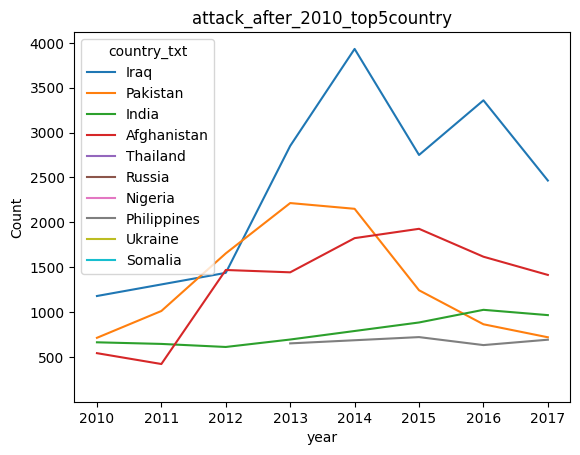

In [24]:
# sns.lineplot(x, y, hue, data)
sns.lineplot(x = 'iyear', y = 'count', hue = 'country_txt', data = attack_after_2010_top5)
plt.title('attack_after_2010_top5country')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

Highest attacks happened on iraq and it was max in 2014

In [25]:
gtd.success.value_counts()/gtd.success.count() *100

1    88.959827
0    11.040173
Name: success, dtype: float64

In [26]:
gtd.success.count()

181691

This shows that 89% is the success count of terrorist attack and 11 percent is the non success or accident happend.

In [27]:
success_df = (gtd.success.value_counts()/gtd.success.count() *100).reset_index()

In [28]:
success_df.rename(columns = {'index': 'Success', 'success': 'percent'}, inplace= True)

success_df

,Success,percent
0,1,88.959827
1,0,11.040173


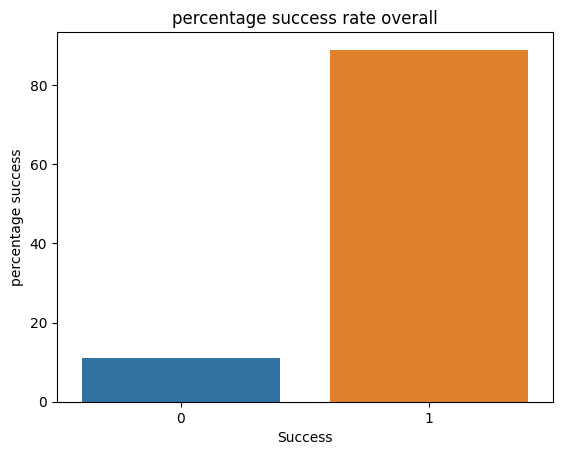

In [29]:
# sns.barplot(x, y, data)
# plt.title()
# plt.xlabel()
# plt.ylabel()

sns.barplot(x = 'Success', y = 'percent', data = success_df)
plt.title("percentage success rate overall")
plt.xlabel('Success')
plt.ylabel('percentage success')
plt.show()


Lets understand the correlation between incident type and kill

In [30]:
attack_type = gtd.groupby(['attacktype1_txt', 'success']).size().reset_index(name = 'count')
attack_type


,attacktype1_txt,success,count
0,Armed Assault,0,2324
1,Armed Assault,1,40345
2,Assassination,0,4697
3,Assassination,1,14615
4,Bombing/Explosion,0,10725
5,Bombing/Explosion,1,77530
6,Facility/Infrastructure Attack,0,577
7,Facility/Infrastructure Attack,1,9779
8,Hijacking,0,80
9,Hijacking,1,579


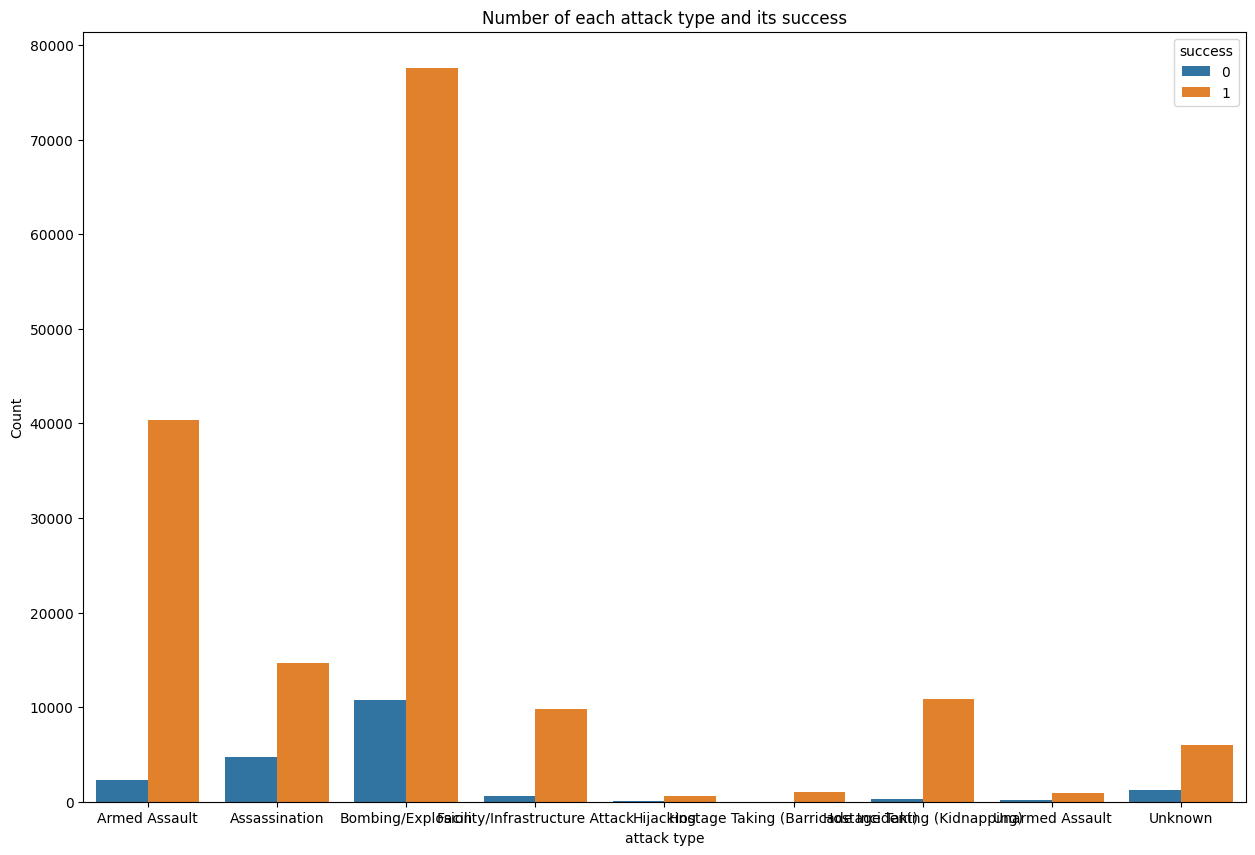

In [37]:
# plt.figure(figsize = (15,10))
# plt.title("")
# sns.barplot(x, y, hue, data, color)
# plt.xlabel("")
# plt.ylabel("")

plt.figure(figsize = (15,10))
plt.title("Number of each attack type and its success")
sns.barplot(x = 'attacktype1_txt', y = 'count', hue = 'success', data = attack_type)
plt.xlabel("attack type")
plt.ylabel("Count")
plt.show()

Bombing/Explosion had the highest number of terrorist attacks and the highesr success rate, followed by armed assault!

In [38]:
## Casualties due to Terrorist Attacks around the world

nkills_attack = gtd.groupby('attacktype1_txt')['nkill'].sum().reset_index()
nkills_attack

,attacktype1_txt,nkill
0,Armed Assault,160297.0
1,Assassination,24920.0
2,Bombing/Explosion,157321.0
3,Facility/Infrastructure Attack,3642.0
4,Hijacking,3718.0
5,Hostage Taking (Barricade Incident),4478.0
6,Hostage Taking (Kidnapping),24231.0
7,Unarmed Assault,880.0
8,Unknown,32381.0


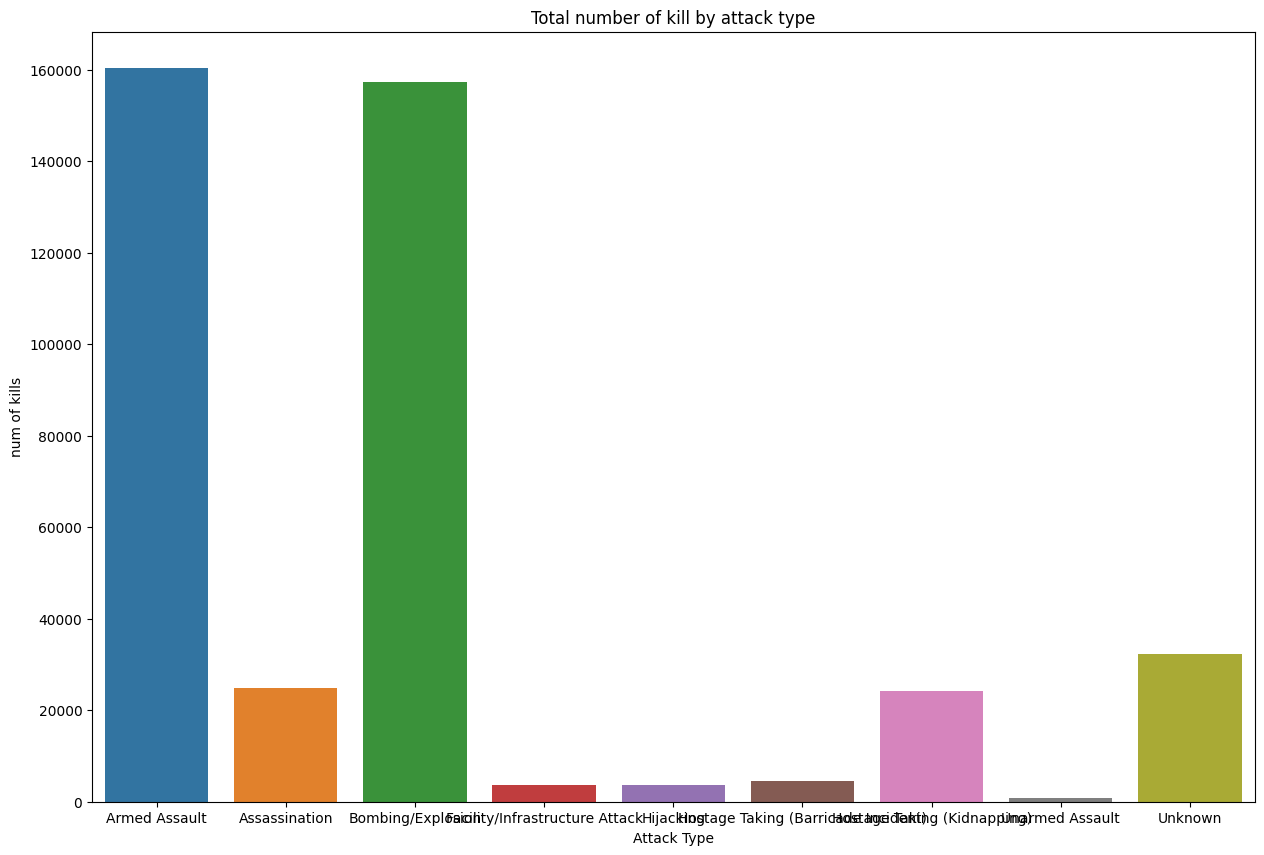

In [41]:
# plt.figure(figsize = (15,10))
# sns.barplot(x, y , hue, data, color)
# plt.title("")
# plt.xlabel('')
# plt.ylabel('')
# plt.show

plt.figure(figsize = (15,10))
sns.barplot(x = 'attacktype1_txt', y = 'nkill' ,data = nkills_attack)
plt.title("Total number of kill by attack type")
plt.xlabel('Attack Type')
plt.ylabel('num of kills')
plt.show()

Despite Armed Assault having way less events and a much lower success rate, it stands as one of
the attack types with the highest number of casualties along side bombing and explosion.

Lets have a look at my country and its neighbour

In [ ]:
mycountry = gtd[(gtd['country_txt'] == 'India') | (gtd['country_txt'] == 'Pakistan') | (gtd['country_txt'] == 'Sri Lanka ') ]
mycountry.head()

In [ ]:
mycountry_india = gtd[gtd['country_txt'] == 'India']
mycountry_india

In [52]:
num_of_attack_india = mycountry_india.groupby('iyear').size().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
num_of_attack_india.head(1)

,iyear,count
40,2016,1025


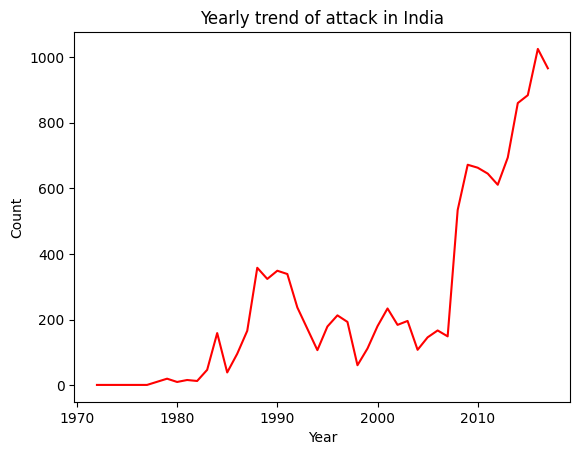

In [54]:
sns.lineplot(x = 'iyear', y = 'count', data = num_of_attack_india, color = 'red')
plt.title("Yearly trend of attack in India")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [66]:
# grouping by success rate.

mycountry_india_success = mycountry_india.success.value_counts().reset_index()
mycountry_india_success.rename(columns = {'index': 'success', 'success': 'count'}, inplace = True)
mycountry_india_success

,success,count
0,1,10280
1,0,1680


In [69]:
mycountry_india_success['Percent'] = mycountry_india_success['count']/(mycountry_india_success['count'].sum())*100
mycountry_india_success

,success,count,Percent
0,1,10280,85.953177
1,0,1680,14.046823


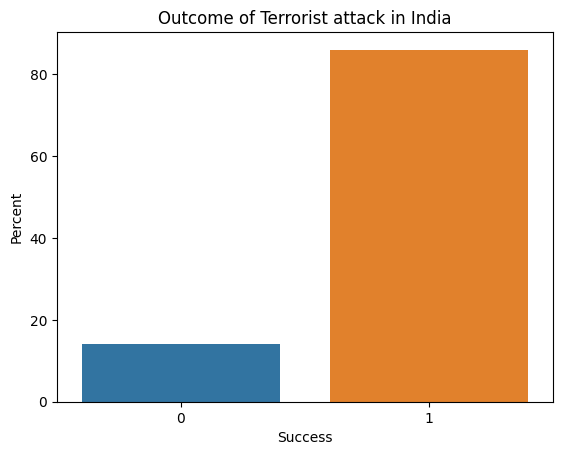

In [71]:
# plt.title("")
# sns.barplot(x, y , data)
# plt.xlabel("")
# plt.ylabel("")

plt.title("Outcome of Terrorist attack in India")
sns.barplot(x = "success", y = "Percent" , data = mycountry_india_success)
plt.xlabel("Success")
plt.ylabel("Percent")
plt.show()

In [73]:
## attack based on attack type.
mycountry_india_attacktype = mycountry_india.groupby(['attacktype1_txt', 'success']).size().reset_index(name = "count")

mycountry_india_attacktype.head(1)

,attacktype1_txt,success,count
0,Armed Assault,0,244


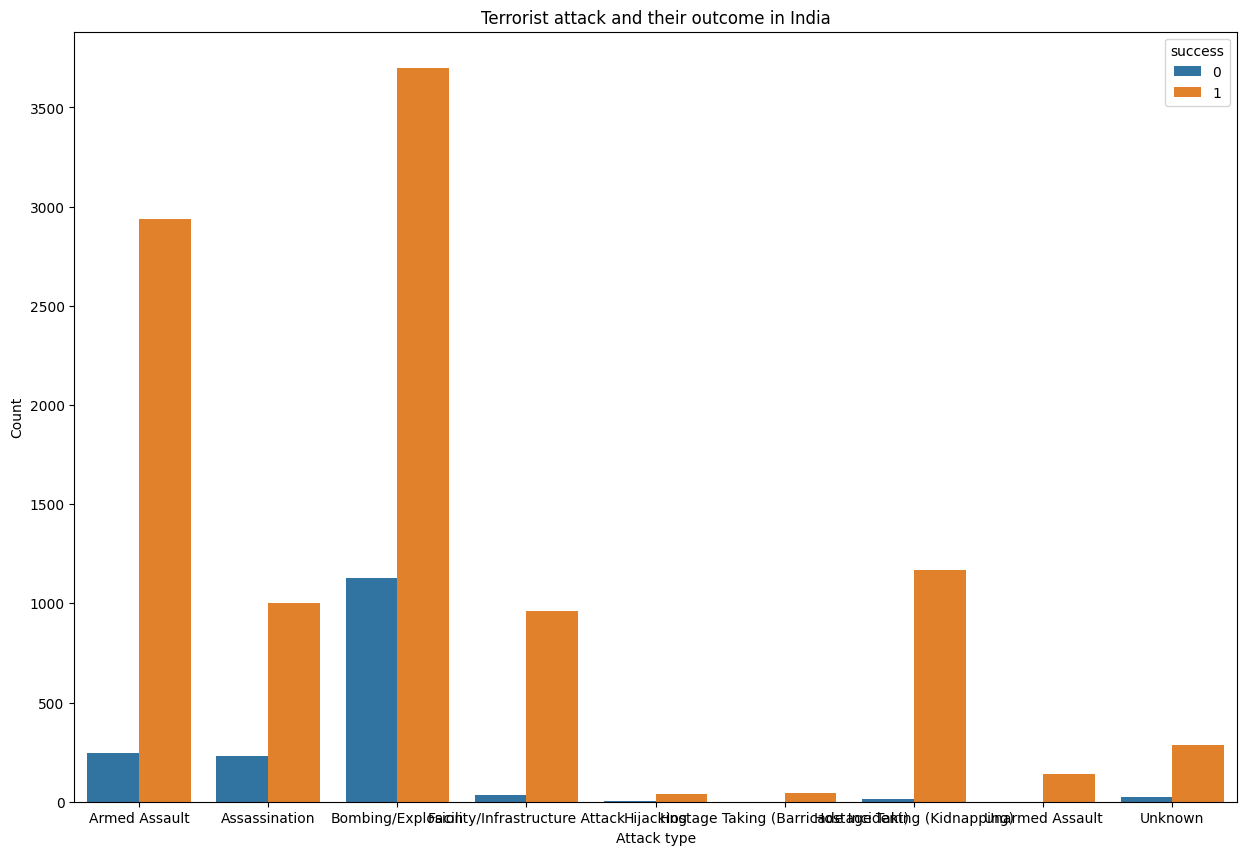

In [74]:
# plt.figure(figsize = (25,10))
# sns.barplot(x, y, hue, data, color)
# plt.title("")
# plt.xlabel("")
# plt.ylabel("")

plt.figure(figsize = (15,10))
sns.barplot(x = "attacktype1_txt", y= 'count', hue= 'success', data=mycountry_india_attacktype)
plt.title("Terrorist attack and their outcome in India")
plt.xlabel("Attack type")
plt.ylabel("Count")
plt.show()

Attacks Types in India and Casualties

In [76]:
nkillattack_india = mycountry_india.groupby(['attacktype1_txt'])['nkill'].sum().reset_index()
nkillattack_india.head(1)

,attacktype1_txt,nkill
0,Armed Assault,9378.0


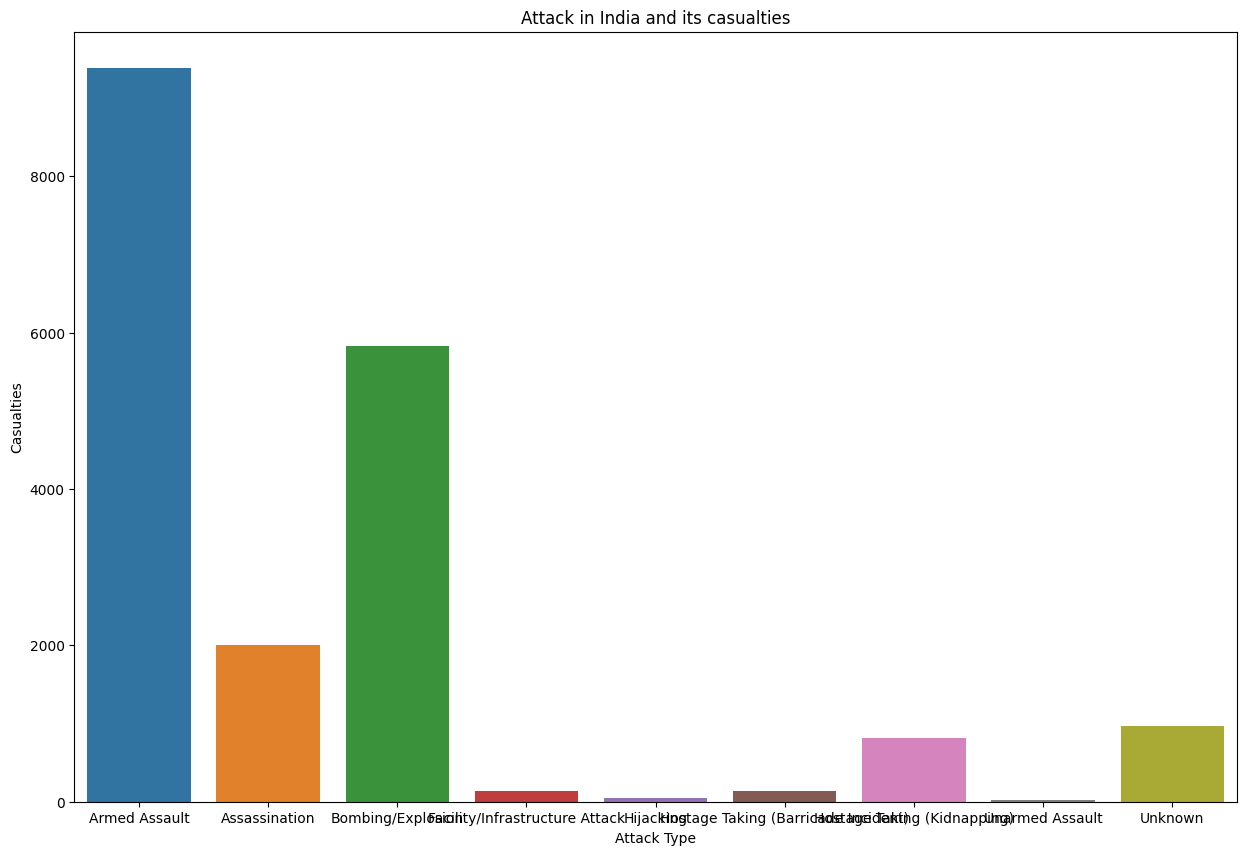

In [77]:
# plt.figure(figsize = (25,10))
# sns.barplot(x, y , data)
# plt.title("")
# plt.xlabel("")
# plt.ylabel("")

plt.figure(figsize = (15,10))
sns.barplot(x = 'attacktype1_txt', y = 'nkill' , data = nkillattack_india)
plt.title("Attack in India and its casualties")
plt.xlabel("Attack Type")
plt.ylabel("Casualties")
plt.show()

Armed Assalut has caused maximum casualties followed by Bomb explosion and Assassination.